# ML methods for predicting viral-host interactions between COVID and human proteins.
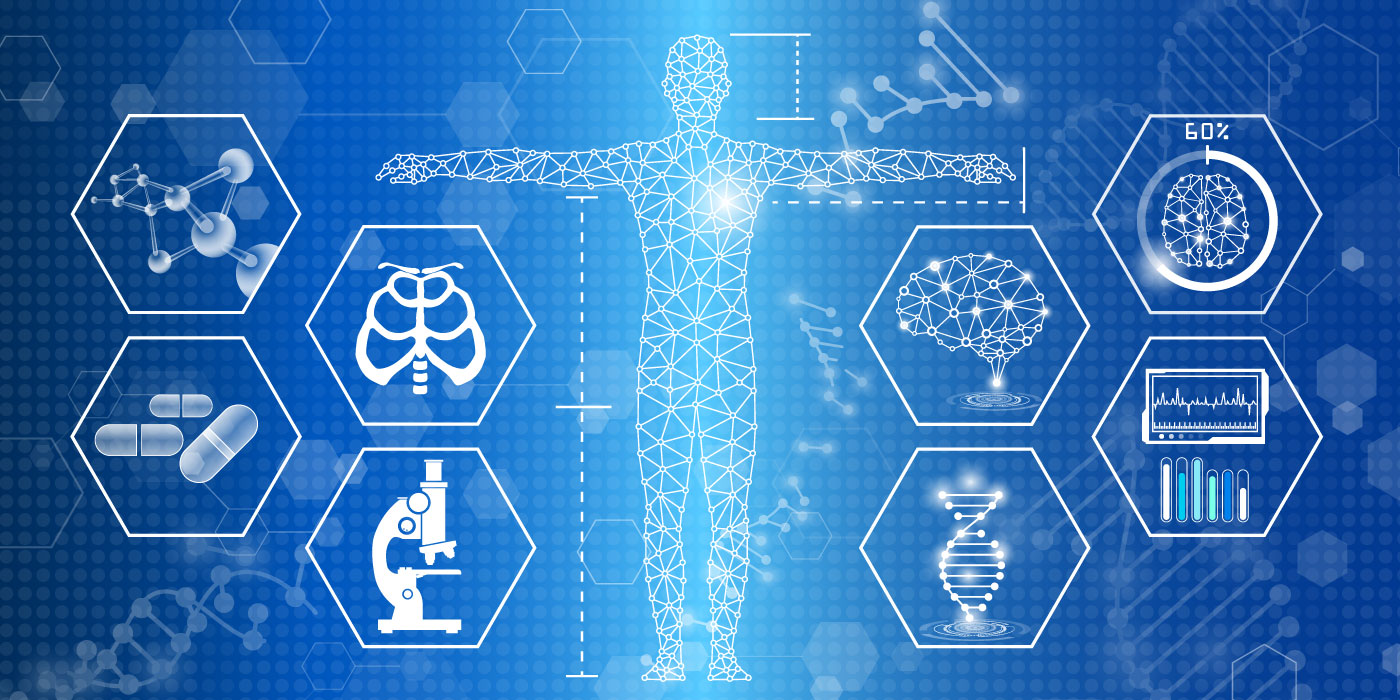

COVID-19 (Coronavirus Disease-19), a disease caused by the SARS-CoV-2 virus,
has been declared as a pandemic by the World Health Organization on March 11, 2020. Over
15 million people have already been affected worldwide by COVID-19, resulting in more
than 0.6 million deaths. Protein-protein interactions (PPIs) play a key role in the cellular
process of SARS-CoV-2 virus infection in the human body.

According to the World Health Organization (WHO), the
coronavirus disease (COVID-19) pandemic, caused by a novel
strain of coronavirus called severe acute respiratory
syndrome coronavirus 2 (SARS-CoV-2) virus infection, is one
of the most crucial diseases in the current scenario.

In comparison, laboratory identification
of PPIs is usually time-consuming, laborious, and difficult to
achieve complete protein interactomes. Therefore, efficient
computational methods for PPI prediction are used to bridge the gap by presenting experimentally testable hypotheses and
removing protein pairs having a low probability of interaction
to reduce the selection of PPI candidates. Computational
techniques have been popularly used for predicting viralehost
interactions 

### Importing the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
main_df = pd.read_csv('PROTEINDATA.csv' ,encoding= 'unicode_escape')

In [3]:
main_df

,Bait,Preys,PreyGene,MIST,Saint_BFDR,AvgSpec,FoldChange,Interaction
0,SARS-CoV2 E,O00203,AP3B1,0.963550,0.00,4.670,46.67,1
1,SARS-CoV2 E,O60885,BRD4,0.978488,0.00,2.670,26.67,1
2,SARS-CoV2 E,P25440,BRD2,0.906593,0.00,7.000,70.00,1
3,SARS-CoV2 E,Q6UX04,CWC27,0.893109,0.03,2.670,26.67,1
4,SARS-CoV2 E,Q86VM9,ZC3H18,0.796415,0.00,2.670,26.67,1
...,...,...,...,...,...,...,...,...
1033,SARS-CoV2 Spike,Q9C0B5,ZDHHC5,0.982389,0.00,6.000,60.00,1
1034,SARS-CoV2 Spike,A2VJK8,C1AQ26,0.985884,0.03,18.783,20.00,0
1035,SARS-CoV2 Spike,A2VJK8,D5YRR7,0.966749,0.07,15.664,60.00,0
1036,SARS-CoV2 Spike,C6TEX2,Q41038,0.952311,0.07,10.011,20.00,0


In [4]:
main_df.describe()

,MIST,Saint_BFDR,AvgSpec,FoldChange,Interaction
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.789470,0.030347,12.606308,100.764663,0.319846
std,0.198234,0.029435,14.191878,177.059588,0.466641
min,0.400919,0.000000,2.000000,14.670000,0.000000
25%,0.580852,0.000000,5.000000,30.000000,0.000000
50%,0.876102,0.030000,10.817500,50.000000,0.000000
75%,0.965493,0.050000,16.817750,102.497500,1.000000
max,0.999875,0.090000,181.000000,1810.000000,1.000000


### Data preparation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
main_df = main_df.loc[:, ~main_df.columns.str.contains('^Unnamed')]

In [7]:
main_df

,Bait,Preys,PreyGene,MIST,Saint_BFDR,AvgSpec,FoldChange,Interaction
0,SARS-CoV2 E,O00203,AP3B1,0.963550,0.00,4.670,46.67,1
1,SARS-CoV2 E,O60885,BRD4,0.978488,0.00,2.670,26.67,1
2,SARS-CoV2 E,P25440,BRD2,0.906593,0.00,7.000,70.00,1
3,SARS-CoV2 E,Q6UX04,CWC27,0.893109,0.03,2.670,26.67,1
4,SARS-CoV2 E,Q86VM9,ZC3H18,0.796415,0.00,2.670,26.67,1
...,...,...,...,...,...,...,...,...
1033,SARS-CoV2 Spike,Q9C0B5,ZDHHC5,0.982389,0.00,6.000,60.00,1
1034,SARS-CoV2 Spike,A2VJK8,C1AQ26,0.985884,0.03,18.783,20.00,0
1035,SARS-CoV2 Spike,A2VJK8,D5YRR7,0.966749,0.07,15.664,60.00,0
1036,SARS-CoV2 Spike,C6TEX2,Q41038,0.952311,0.07,10.011,20.00,0


In [8]:
# Splitting features and target 
X = main_df.drop(['Preys', 'PreyGene','Bait', 'Interaction' ],axis=1)
y = main_df['Interaction']

In [9]:
X

,MIST,Saint_BFDR,AvgSpec,FoldChange
0,0.963550,0.00,4.670,46.67
1,0.978488,0.00,2.670,26.67
2,0.906593,0.00,7.000,70.00
3,0.893109,0.03,2.670,26.67
4,0.796415,0.00,2.670,26.67
...,...,...,...,...
1033,0.982389,0.00,6.000,60.00
1034,0.985884,0.03,18.783,20.00
1035,0.966749,0.07,15.664,60.00
1036,0.952311,0.07,10.011,20.00


### Scaling of features 

In [10]:
col_to_scale = ['FoldChange']

In [11]:
# scaler
scaler = MinMaxScaler().fit(main_df[col_to_scale])

In [12]:
main_df[col_to_scale] = scaler.transform(main_df[col_to_scale])

In [13]:
main_df

,Bait,Preys,PreyGene,MIST,Saint_BFDR,AvgSpec,FoldChange,Interaction
0,SARS-CoV2 E,O00203,AP3B1,0.963550,0.00,4.670,0.017824,1
1,SARS-CoV2 E,O60885,BRD4,0.978488,0.00,2.670,0.006684,1
2,SARS-CoV2 E,P25440,BRD2,0.906593,0.00,7.000,0.030819,1
3,SARS-CoV2 E,Q6UX04,CWC27,0.893109,0.03,2.670,0.006684,1
4,SARS-CoV2 E,Q86VM9,ZC3H18,0.796415,0.00,2.670,0.006684,1
...,...,...,...,...,...,...,...,...
1033,SARS-CoV2 Spike,Q9C0B5,ZDHHC5,0.982389,0.00,6.000,0.025249,1
1034,SARS-CoV2 Spike,A2VJK8,C1AQ26,0.985884,0.03,18.783,0.002969,0
1035,SARS-CoV2 Spike,A2VJK8,D5YRR7,0.966749,0.07,15.664,0.025249,0
1036,SARS-CoV2 Spike,C6TEX2,Q41038,0.952311,0.07,10.011,0.002969,0


In [14]:
main_df.describe()

,MIST,Saint_BFDR,AvgSpec,FoldChange,Interaction
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.789470,0.030347,12.606308,0.047955,0.319846
std,0.198234,0.029435,14.191878,0.098622,0.466641
min,0.400919,0.000000,2.000000,0.000000,0.000000
25%,0.580852,0.000000,5.000000,0.008539,0.000000
50%,0.876102,0.030000,10.817500,0.019679,0.000000
75%,0.965493,0.050000,16.817750,0.048920,1.000000
max,0.999875,0.090000,181.000000,1.000000,1.000000


In [15]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

In [16]:
X_test

,MIST,Saint_BFDR,AvgSpec,FoldChange
924,0.978101,0.00,55.000,550.00
197,0.993975,0.00,4.670,46.67
402,0.415529,0.05,10.219,626.67
338,0.918145,0.07,15.735,66.67
354,0.972808,0.07,17.390,46.67
...,...,...,...,...
823,0.772353,0.00,23.330,233.33
748,0.938973,0.08,16.738,46.67
259,0.956356,0.07,19.485,20.00
386,0.527545,0.04,11.799,900.00


Data is now more or less ready to be trained

### Modeling

##### Model 1: Decision Trees

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.
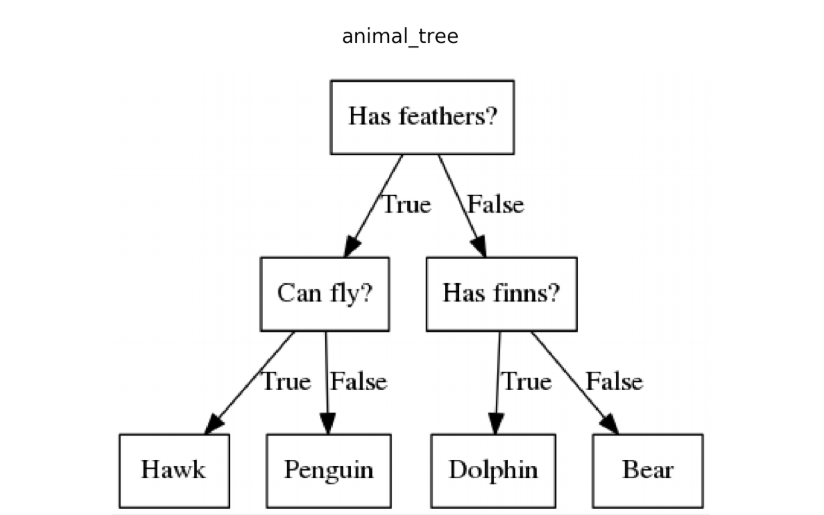

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
train_preds = model.predict(X_train)

In [74]:
train_preds

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [23]:
pd.value_counts(train_preds)

0    494
1    232
dtype: int64

In [24]:
model.score(X,y)

0.9903660886319846

In [25]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [32]:
importance_df

,feature,importance
1,Saint_BFDR,0.340243
0,MIST,0.291034
2,AvgSpec,0.279752
3,FoldChange,0.088970


##### Model 2 : Random forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">




In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(n_jobs=-9, random_state=1000)

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-9, random_state=1000)

In [37]:
model.score(X_train, y_train)

1.0

In [38]:
model.score(X_test, y_test)

0.9711538461538461

Feature importance looks as follows

In [39]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [40]:
importance_df

,feature,importance
1,Saint_BFDR,0.318626
2,AvgSpec,0.274503
0,MIST,0.272402
3,FoldChange,0.134469


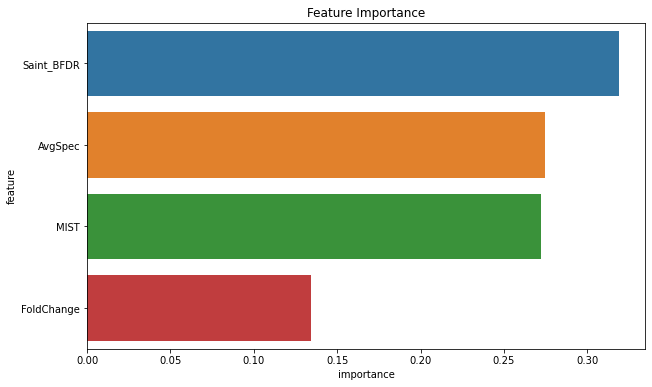

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

##### Model 3 : Gradient boosting by XGBoost

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.
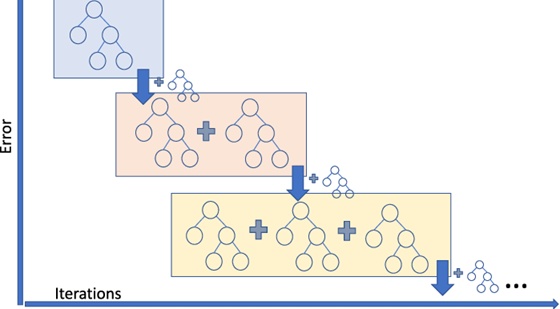

In [43]:
from xgboost import XGBRegressor

In [44]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [45]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [46]:
preds = model.predict(X)

In [47]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [48]:
rmse(preds,y)

0.10590654171293265

In [49]:
model.score(X,y)

0.9484418298068865

##### Model 4: SVM

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.
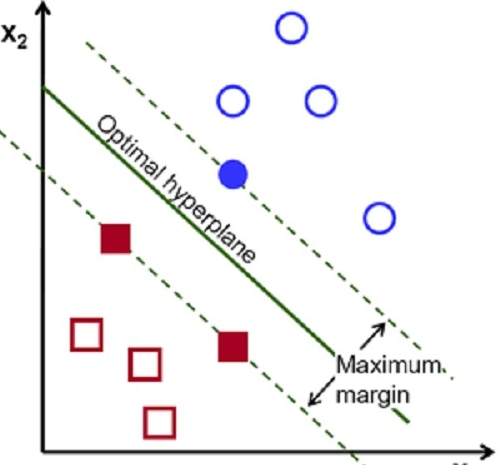

In [50]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [69]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Polynomial kernel

In [70]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

<AxesSubplot:>

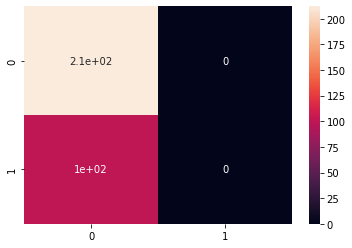

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [73]:
clf.score(X_train, y_train)

0.6804407713498623

References:

https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost

https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878

https://www.coursera.org/learn/machine-learning

https://www.nature.com/articles/s41586-020-2286-9

https://www.sciencedirect.com/science/article/pii/S2319417020301360



